<a href="https://colab.research.google.com/github/Nikolau2321/Kaggle-Spaceship-Titanic/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%93%D1%80%D1%83%D0%BF%D0%BF%D0%BE%D0%B2%D0%BE%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv',index_col='Id')
test = pd.read_csv('/content/drive/MyDrive/test.csv',index_col='Id')
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


# Анализ и результаты

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Много пропусков. Есть атрибуты и без таковых

Начнем с анализа числовых столбцов. Целью будет являться анализ пропусков, выбросов и корреляций

In [ ]:
#train['Id'] = train['Id'].astype("object")
#test['Id'] = test['Id'].astype("object")

Количество числ. столбцов =  37


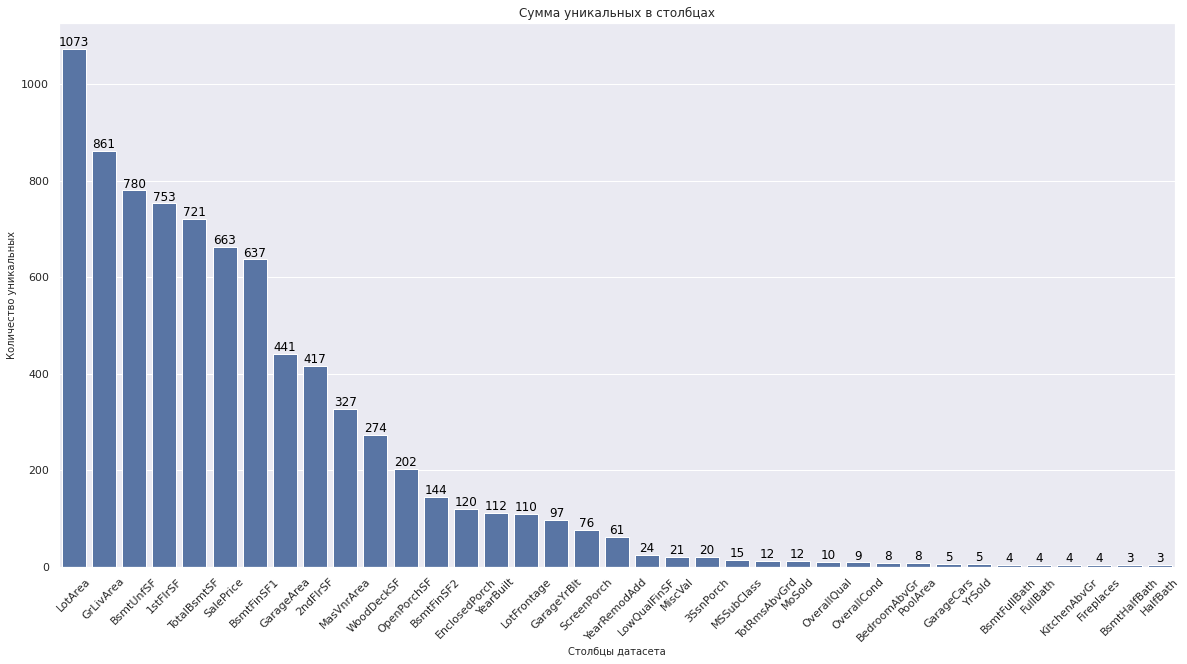

In [ ]:
numeric_columns = train.select_dtypes(exclude=['object']).columns.values.tolist()
print('Количество числ. столбцов = ',len(numeric_columns))
unique_values=[]
for item in numeric_columns: unique_values.append(train[item].nunique())
numeric_column_list = list(zip(numeric_columns, unique_values))
numeric_column_list = sorted(numeric_column_list,key=lambda l:l[1], reverse=True)
numeric_column_list=pd.DataFrame(numeric_column_list, columns=['Column-Names', 'Unique-Values'])


plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=numeric_column_list['Column-Names'], y=numeric_column_list['Unique-Values'],color='b')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                   (p.get_x() + 0.4, p.get_height()),
                   ha='center',
                   va='bottom',
                   color='black')
plt.xticks(rotation=45)
plt.ylabel('Количество уникальных', fontsize=10)
plt.xlabel('Столбцы датасета', fontsize=10)
plt.title('Сумма уникальных в столбцах')
plt.show()

Заметим, что до 19 параметра (вкл целевую переменную - цена), количество уникальных значений >50. 
Т.е. каждый следующий столбец имеет <2% уникальных значений от общего количества строк



Проанализируем корреляцию выбранных колонок с целевой переменной SalePrice

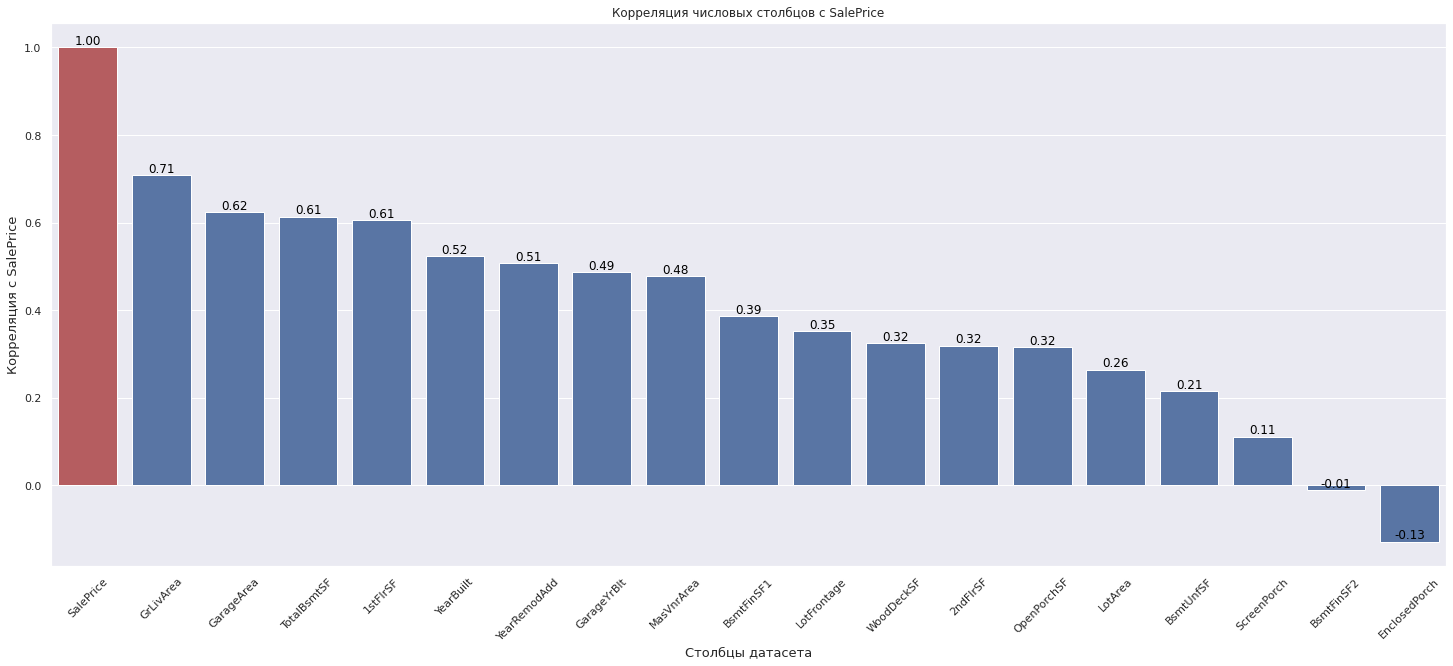

In [ ]:
highly_unique_columns = numeric_column_list.drop(numeric_column_list[numeric_column_list['Unique-Values'] < 49].index)
cols = highly_unique_columns['Column-Names']
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['SalePrice'])))

corr_data = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
corr_data = corr_data.sort_values(by='corrs', ascending=False)
plt.subplots(figsize=(25, 10))
ax=sns.barplot(x=corr_data['cols'], y=corr_data['corrs'], color='lightblue',palette=["b" if x!='SalePrice' else 'r' for x in corr_data['cols']])
plt.xticks(rotation=45)
plt.ylabel('Корреляция c SalePrice', fontsize=13)
plt.xlabel('Столбцы датасета', fontsize=13)
plt.title('Корреляция числовых столбцов с SalePrice')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()),
                   (p.get_x() + 0.4, p.get_height()),
                   ha='center',
                   va='bottom',
                   color='black')
plt.show()

Ряд столбцов имеет высокую корреляцию с SalePrice, ряд среднюю, и последние 3 слабую, или коллеляция отсутствует.
Отобразим графически эти переменные

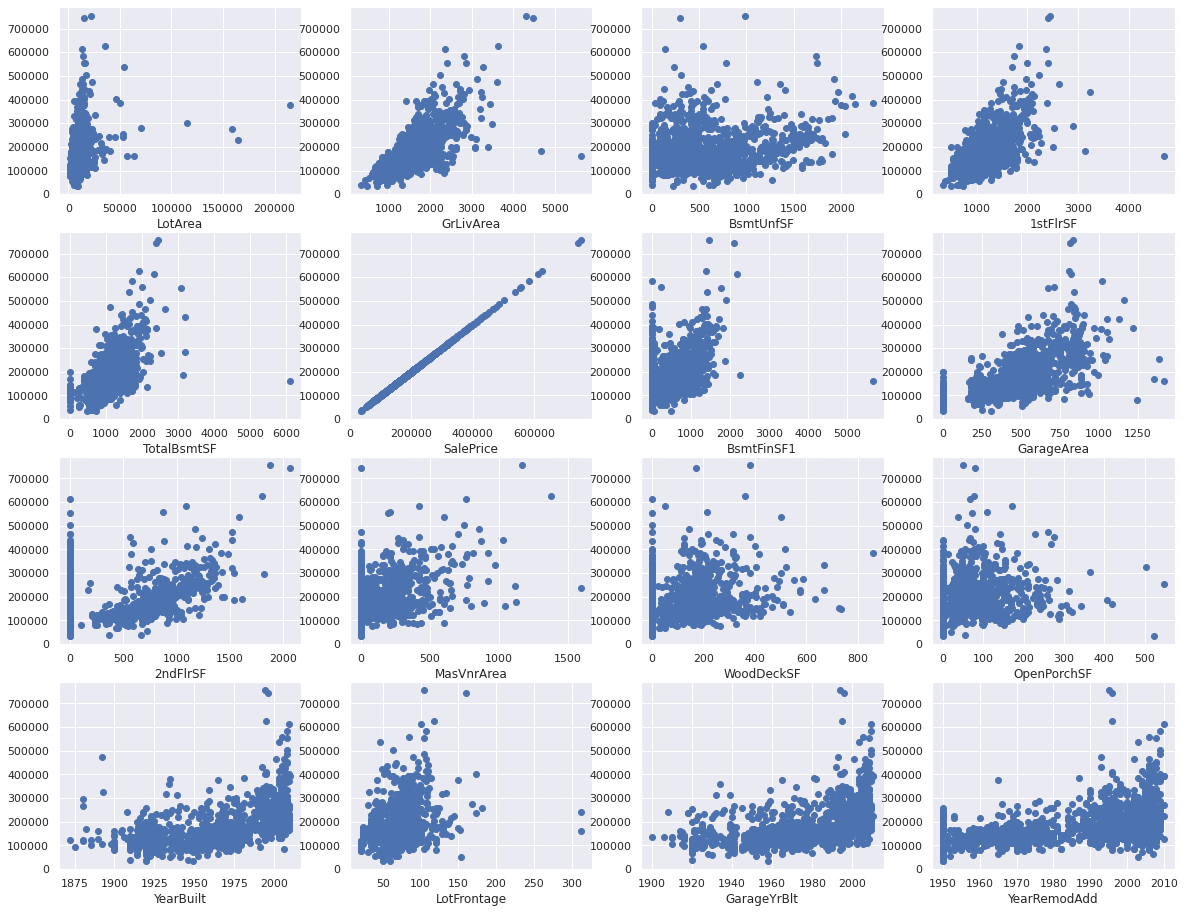

In [ ]:
cols = cols.drop(cols[((cols == 'ScreenPorch') + (cols == 'BsmtFinSF2') + (cols == 'EnclosedPorch'))].index).reset_index(drop=True)

def relation_with_SalePrice(c,column):
    plt.subplot(5, 4, c)
    plt.scatter(x = train[column], y = train['SalePrice'])
    plt.xlabel(column)    

c=1
plt.subplots(figsize=(20, 20))
for item in cols:
    relation_with_SalePrice(c,item)
    c=c+1
plt.show()

Есть ли выбросы? - да,  возможно присутствуют: 
TotalBsmtSF, 1stFlrSF, BsmtFinSF1, MasVnrArea, LotArea, LotFrontage, GrLivArea, OpenPorshSF







In [ ]:
# Функция отрисовки
def outlier_check_plot(column):
    plt.subplots(figsize=(20, 10))
    # 1 график наибольших значений
    plt.subplot(1, 3, 1)
    plt.scatter(x = train[column].sort_values(ascending=False)[:10], y = train.index[:10], color='b')
    plt.ylabel('Порядковый номер', fontsize=10)
    plt.xlabel(column, fontsize=10)
    plt.title('Рис 1: 10 наибольших значений из столбца {}'.format(column))

    # 2 график распределения
    plt.subplot(1, 3, 2)                                                                                
    sns.distplot(train[column],color='b', rug=True, hist=False)
    plt.ylabel('Распределение', fontsize=10)
    plt.xlabel(column, fontsize=10)
    plt.title('Рис 2: График распределения значений {}'.format(column))

    # 3 график зависимость от SALEPRICE 
    plt.subplot(1, 3, 3)
    plt.scatter(x = train[column], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=10)
    plt.xlabel(column, fontsize=10)
    plt.title('Рис 3: зависимость столбца {} с SalePrice'.format(column))
    plt.show()

До удаления выборосов 1stFlrSF: 


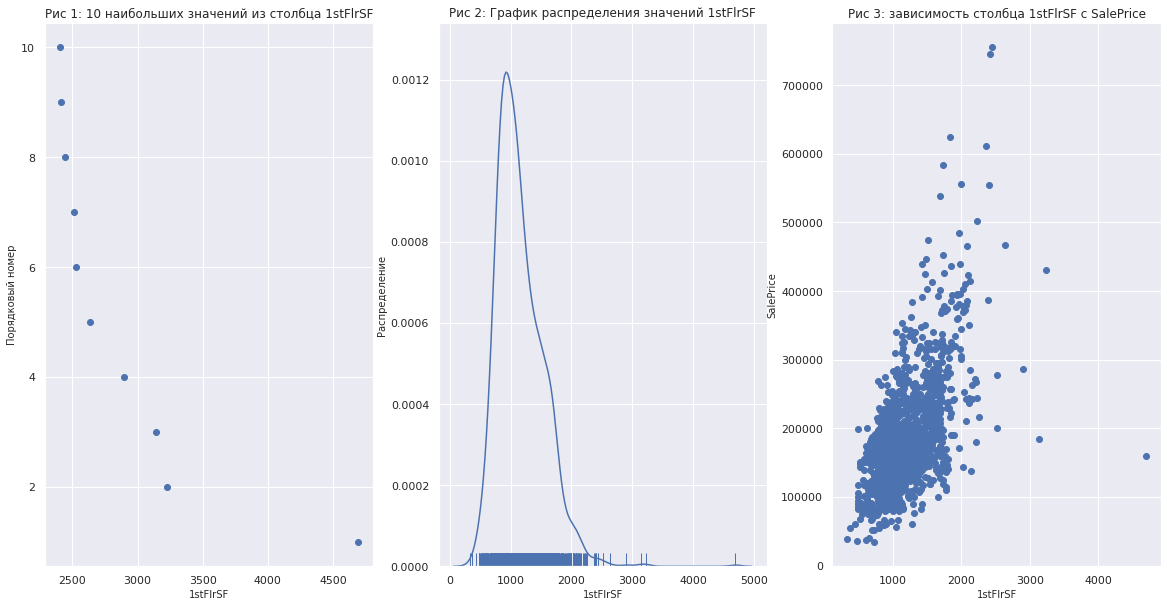

In [ ]:
print('До удаления выборосов 1stFlrSF: ')
outlier_check_plot('1stFlrSF')

Видим один выброс в котором 1stFlrSF > 4000. Удаляем, т.к. и цена достаточна низкая. Удалять с ценой, которая может быть не выбросом, достаточно опасно: все зависит от конкретного распределения

После удаления выбросов 1stFlrSF: 


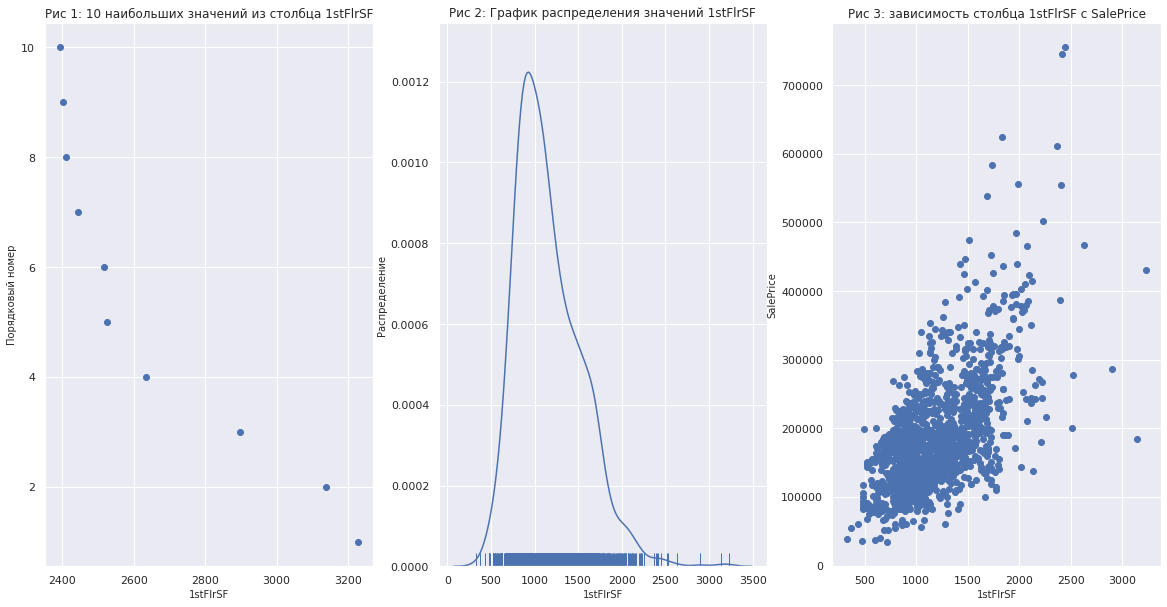

In [ ]:
train = train.drop(train[train['1stFlrSF'] > 4000].index)
print('После удаления выбросов 1stFlrSF: ')
outlier_check_plot('1stFlrSF')

До удаления выборосов BsmtFinSF1: 


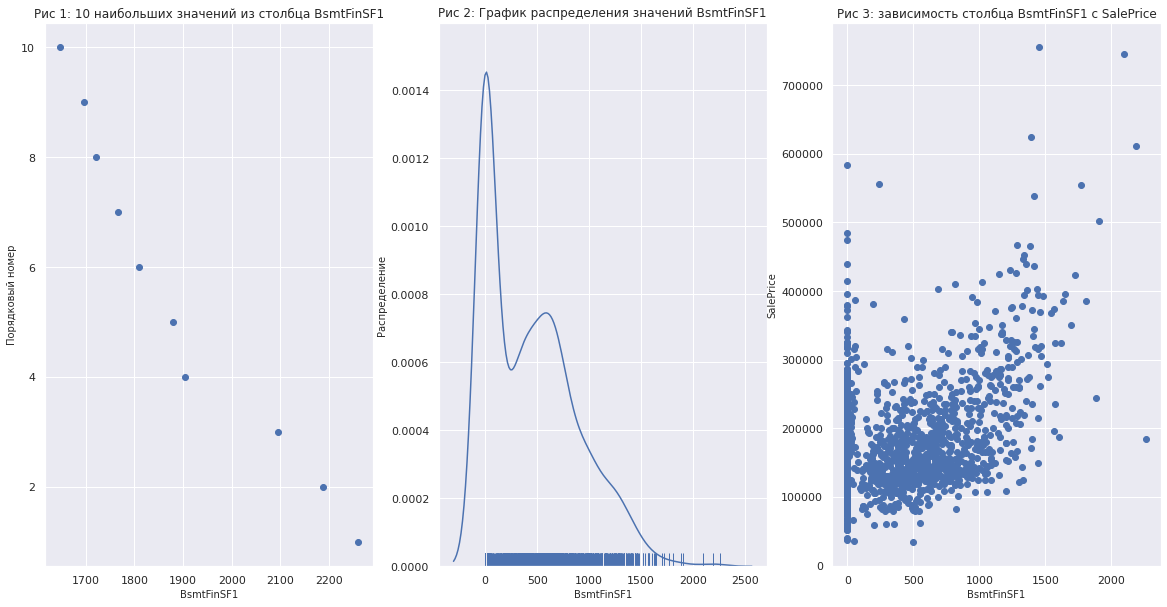

In [ ]:
print('До удаления выборосов BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')

Значения по столбцу свыше 2000 возможно выбросы, но у некоторых значений -высокая цена.
Удаляем выброс с значением BsmtFinSF1 > 2000 и SalePrice < 200000

После удаления выбросов BsmtFinSF1: 


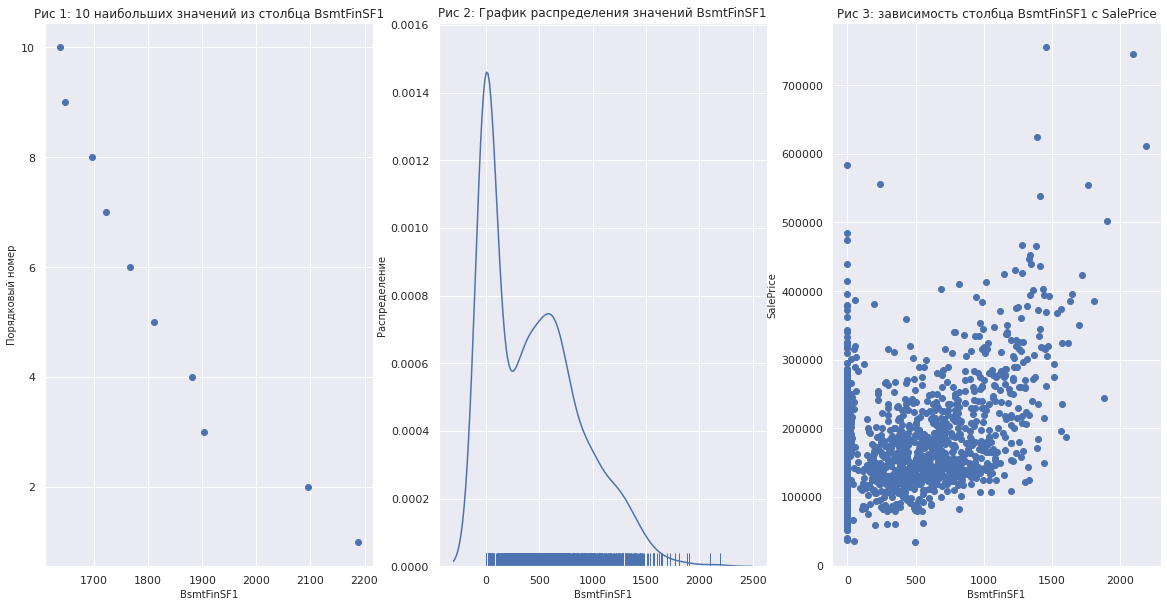

In [ ]:
train = train.drop(train[(train['BsmtFinSF1']>2000) & (train['SalePrice']<200000)].index)
print('После удаления выбросов BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')

До удаления выборосов LotArea: 


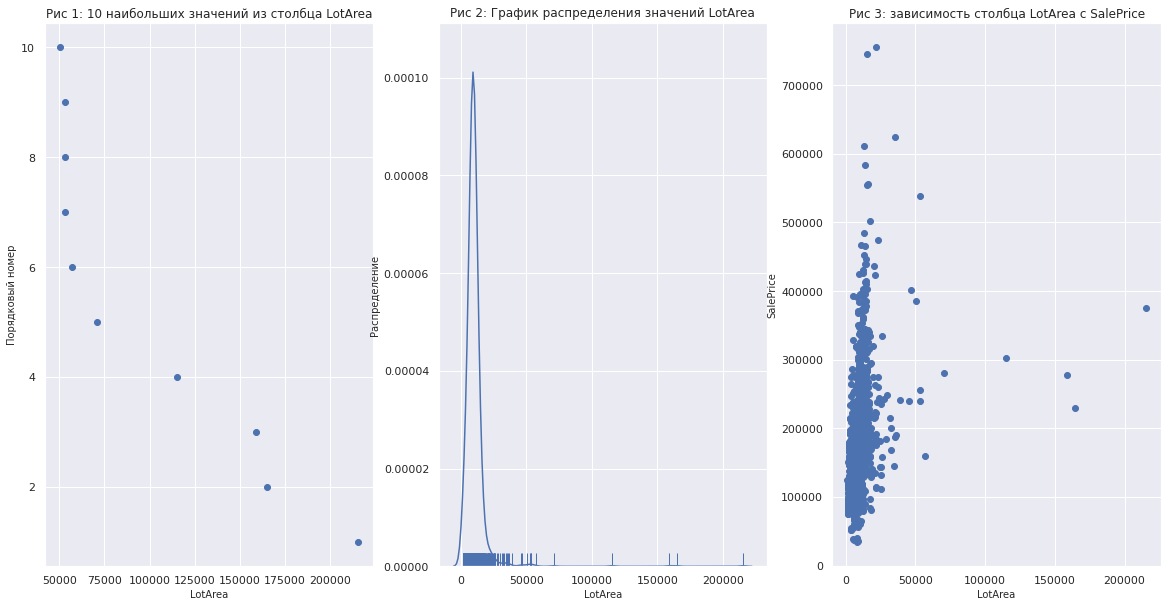

In [ ]:
print('До удаления выборосов LotArea: ')
outlier_check_plot('LotArea')

Исходя из графика распредления и товповых значений столбца, кажется, что выбросы со значениями выше 100000

После удаления выбросов LotArea: 


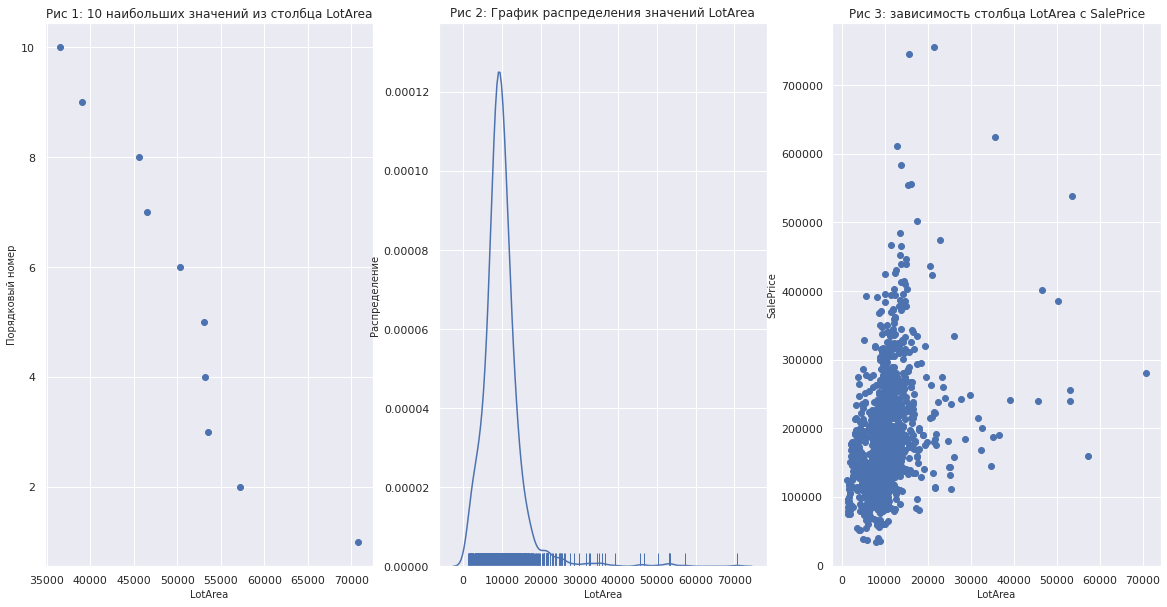

In [ ]:
train = train.drop(train[train['LotArea'] > 100000].index)
print('После удаления выбросов LotArea: ')
outlier_check_plot('LotArea')

До удаления выборосов GrLivArea: 


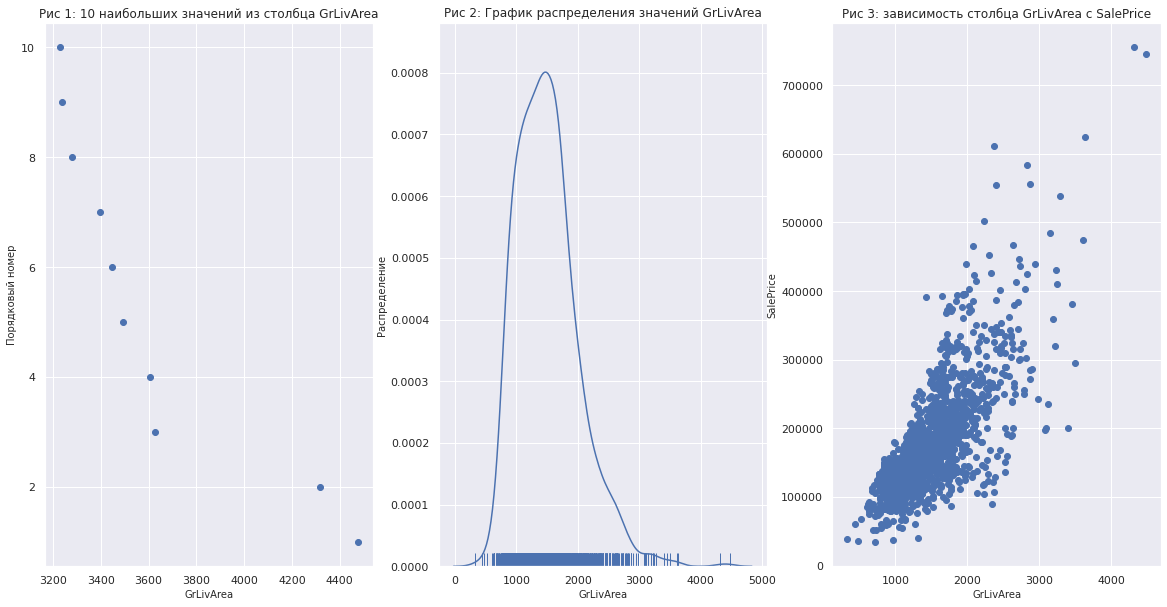

In [ ]:
print('До удаления выборосов GrLivArea: ')
outlier_check_plot('GrLivArea')

Кажется что выбросы есть, но с учетом графика зависимости, можно сказать что цена соответствует высоким значениям

До удаления выбросов MasVnrArea: 


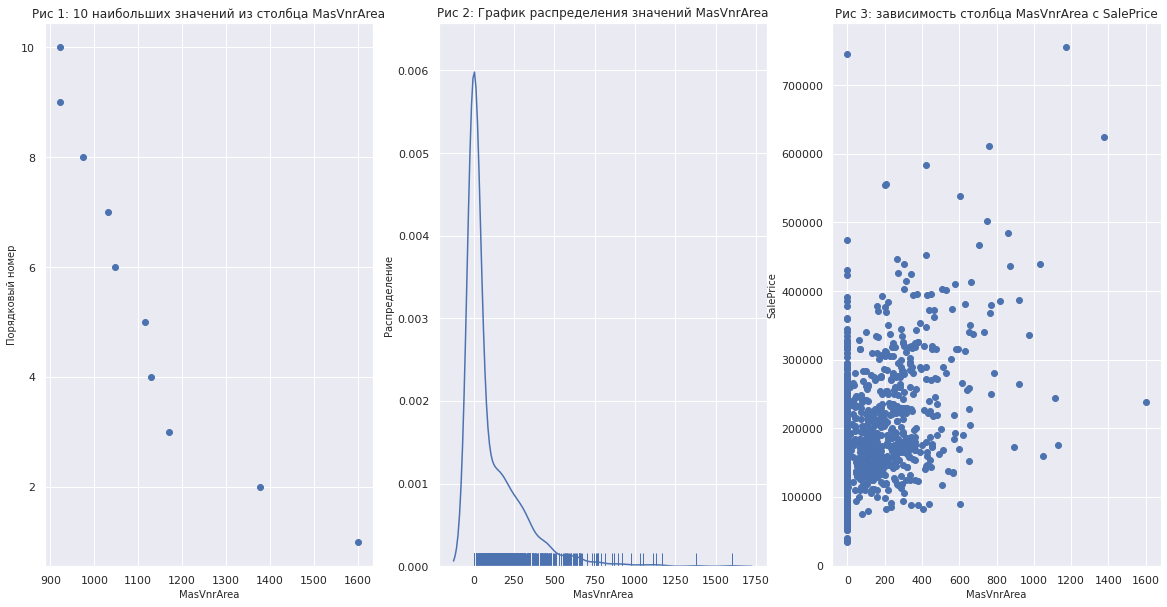

In [ ]:
print('До удаления выбросов MasVnrArea: ')
outlier_check_plot('MasVnrArea')

Выброс со значением 1600

После удаления выбросов MasVnrArea: 


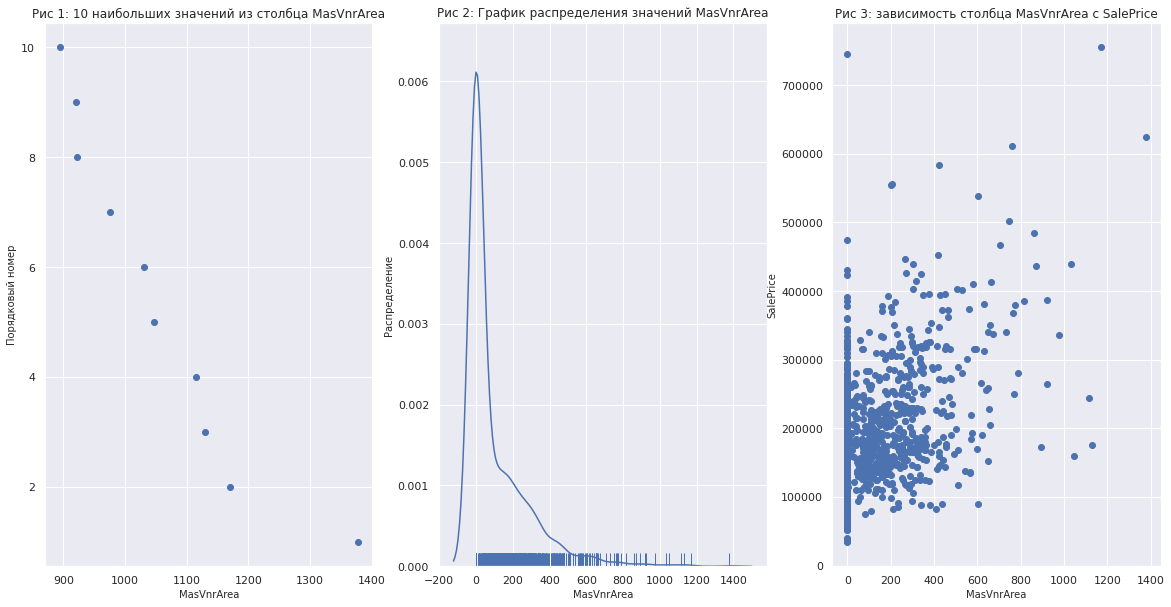

In [ ]:
train = train.drop(train[train['MasVnrArea'] > 1500].index)
print('После удаления выбросов MasVnrArea: ')
outlier_check_plot('MasVnrArea')

До удаления выборосов LotFrontage: 


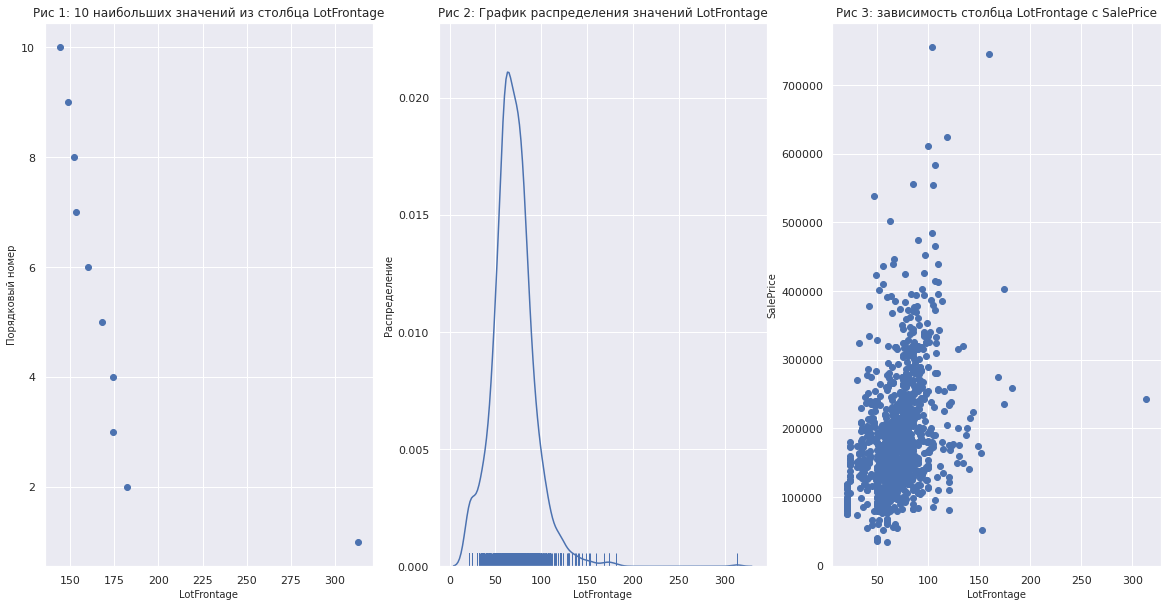

In [ ]:
print('До удаления выборосов LotFrontage: ')
outlier_check_plot('LotFrontage')

Выброс с значением > 300

После удаления выбросов LotFrontage: 


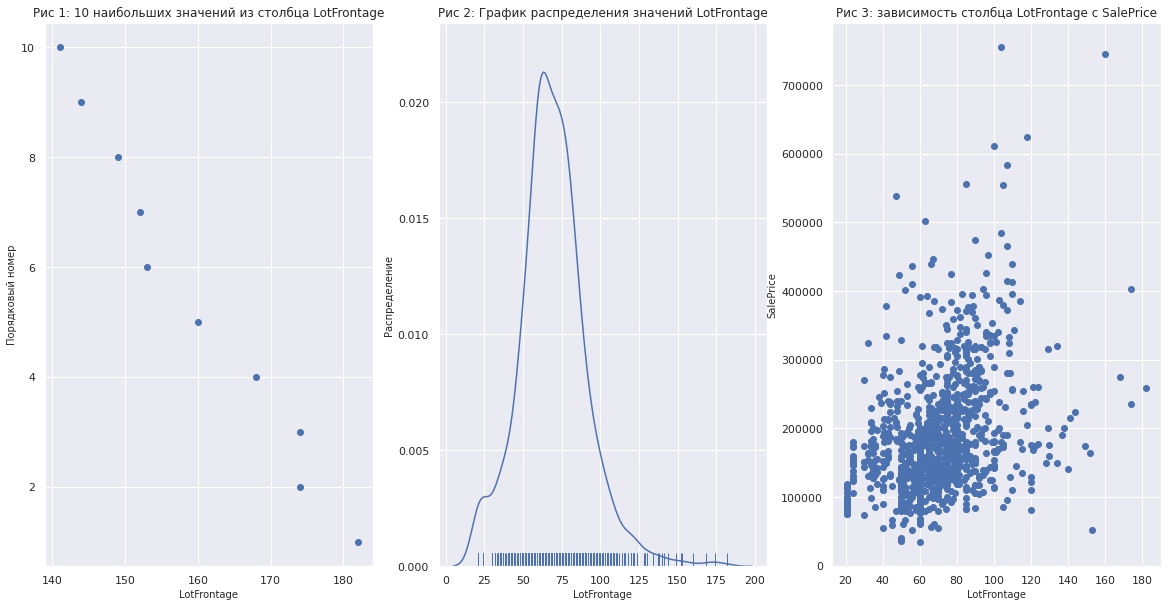

In [ ]:
train = train.drop(train[train["LotFrontage"] > 300].index)
print('После удаления выбросов LotFrontage: ')
outlier_check_plot('LotFrontage')

До удаления выборосов TotalBsmtSF: 


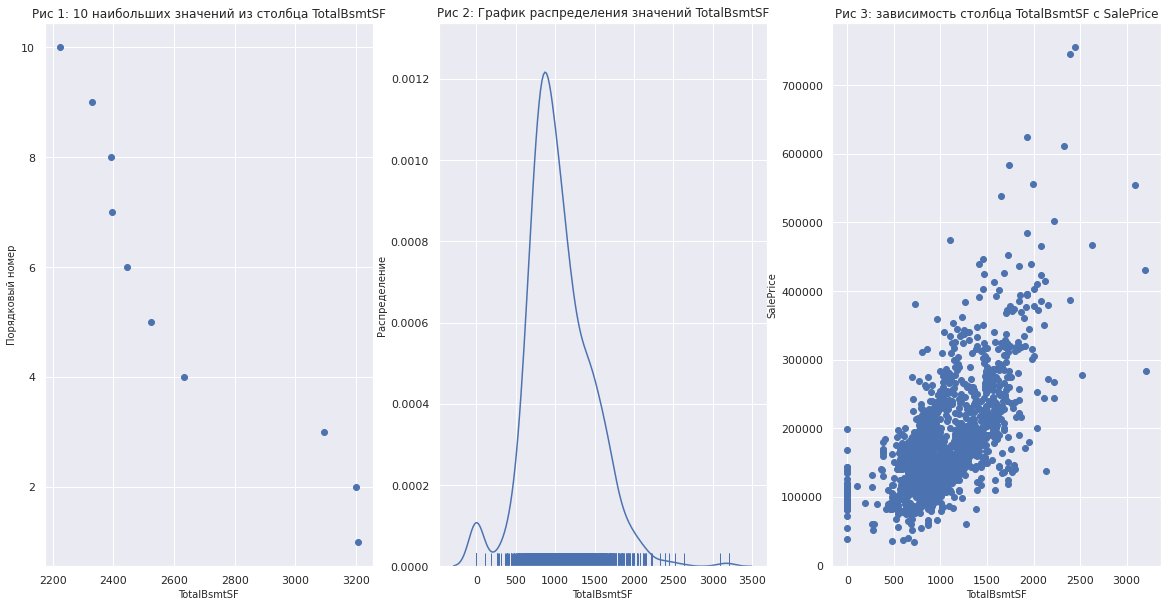

In [ ]:
print('До удаления выборосов TotalBsmtSF: ')
outlier_check_plot('TotalBsmtSF')

НЕ признаем чуть выше значения переменной, т.к. и зависимость цены кажется что соответствующая 

До удаления выборосов OpenPorchSF: 


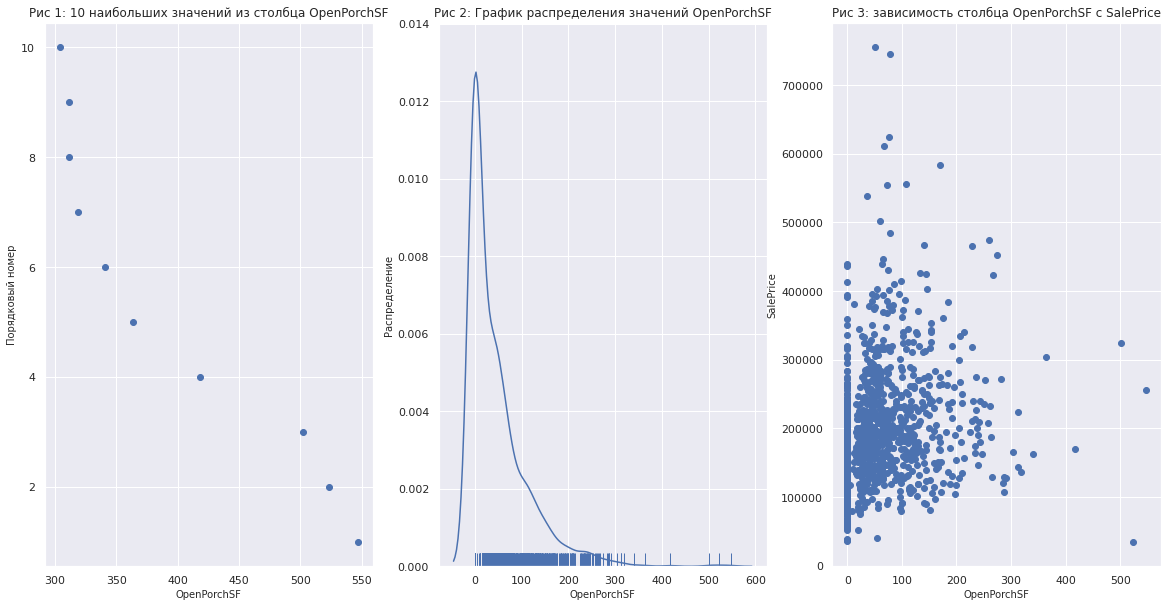

In [ ]:
print('До удаления выборосов OpenPorchSF: ')
outlier_check_plot('OpenPorchSF')

Выброс OpenPorchSF > 500 и SalePrice <100000

После удаления выбросов OpenPorchSF: 


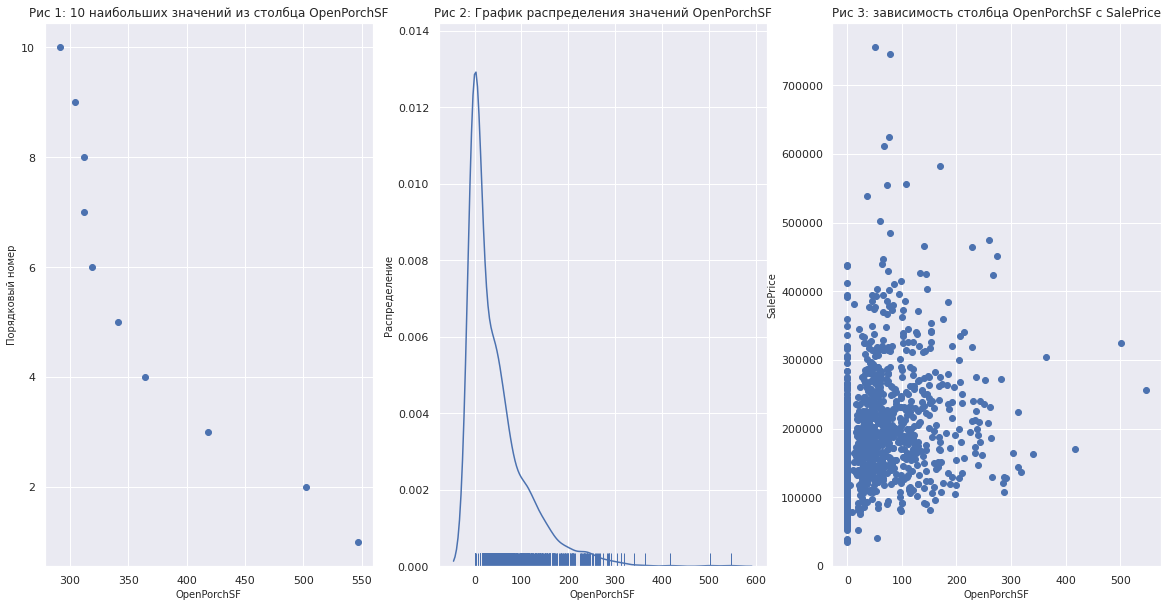

In [ ]:
train = train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<100000)].index)
print('После удаления выбросов OpenPorchSF: ')
outlier_check_plot('OpenPorchSF')

Найдем сильно коррелирующие друг с другом столбцы, чтобы возможно исключить некоторые очень похожие признаки

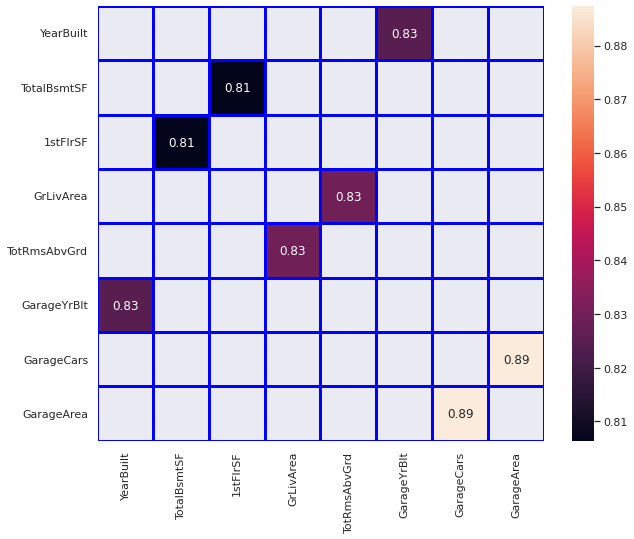

In [ ]:
corr_new = train.drop('SalePrice', axis=1)
corr = corr_new.corr()
corr = corr[abs(corr) > 0.8]
corr = corr.replace(1, np.nan).dropna(how='all').dropna(how='all', axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, linewidths=2, linecolor='blue')

Сильно коррелируют между собой пары признаков GarageCars-GarageArea, TotalBsmtSF-1stFlrSF, TotRmsAbvGrd-GrLivArea, GarageYrBlt-YearBuilt 

Проанализируем корреляцию с целевой переменной, чтобы принять решение об удалении какой то одной из сильно коррелированных переменных

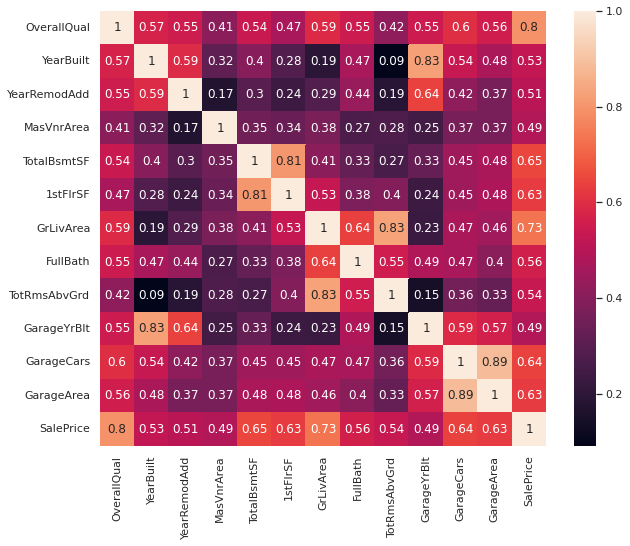

In [ ]:
corr = train.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.49]
plt.figure(figsize=(10,8))
sns.heatmap(train[highest_corr_features].corr(),annot=True)

OverQual коррелирует с SalePrice с коэффициентом 0.8, а GrLivArea с 0.73.
Удалим более низкие корреляции с анализа пар выше: GarageArea, 1stFlrSF, TotRmsAbvGrd, GarageYrBlt

In [ ]:
train.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd','GarageYrBlt'],axis=1,inplace=True)
test.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd','GarageYrBlt'],axis=1,inplace=True)

Анализ пропусков

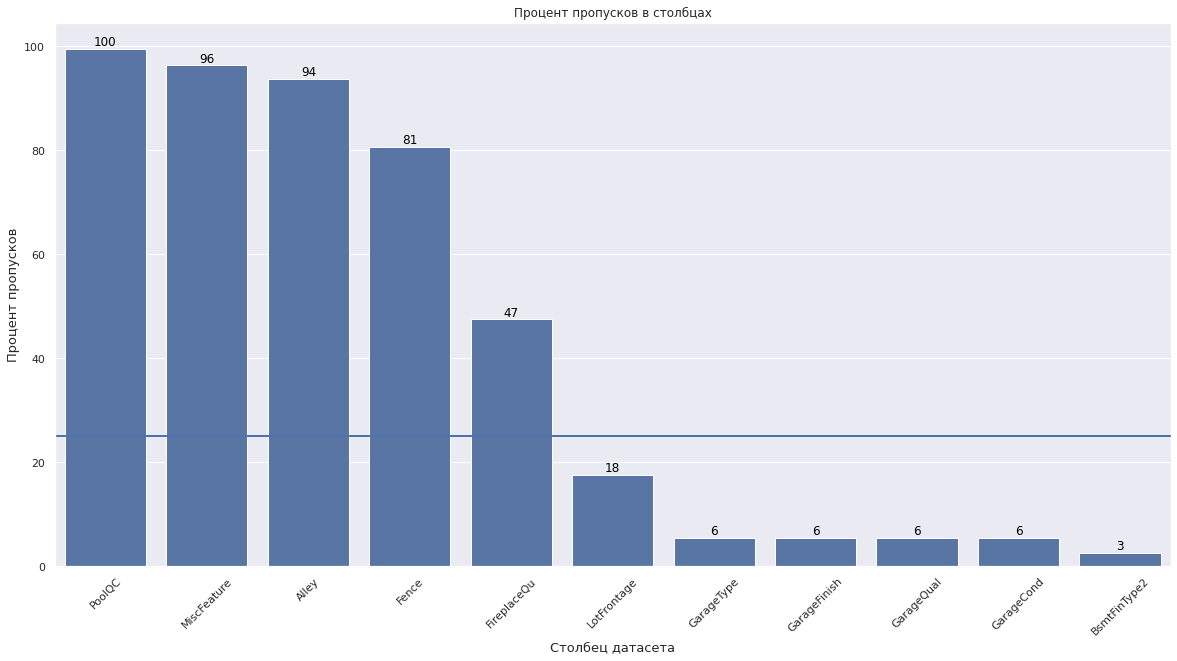

In [ ]:
total_missing = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=missing_data.index[:11], y=missing_data['Percent'][:11]*100,color='b')
plt.xticks(rotation=45)
plt.ylabel('Процент пропусков', fontsize=13)
plt.xlabel('Столбец датасета', fontsize=13)
plt.title('Процент пропусков в столбцах')
ax.axhline(y=25, linewidth=2, color='b')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                   (p.get_x() + 0.4, p.get_height()),
                   ha='center',
                   va='bottom',
                   color='black')
plt.show()

Удалим столбцы с >25% пропусками

In [ ]:
train.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1,inplace=True)
test.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1,inplace=True)

Заполним оставшиеся пропуски: в числовых значениях - медианой, в категориальных - модой (самым встречающимся)

In [ ]:
train['LotFrontage'].fillna(value=train['LotFrontage'].median(),inplace=True)
train['MasVnrType'].fillna(value='None',inplace=True)
train['MasVnrArea'].fillna(0,inplace=True)
train['BsmtCond'].fillna(value='TA',inplace=True)
train['BsmtExposure'].fillna(value='No',inplace=True)
train['Electrical'].fillna(value='SBrkr',inplace=True)
train['BsmtFinType2'].fillna(value='Unf',inplace=True)
train['GarageType'].fillna(value='Attchd',inplace=True)
train['GarageFinish'].fillna(value='Unf',inplace=True)
train['GarageQual'].fillna(value='TA',inplace=True)
train['GarageCond'].fillna(value='TA',inplace=True)
train['BsmtFinType1'].fillna(value='NO',inplace=True)
train['BsmtQual'].fillna(value='No',inplace=True)
train['BsmtFullBath'].fillna(value=train['BsmtFullBath'].median(),inplace=True)
train['BsmtFinSF1'].fillna(value=train['BsmtFinSF1'].median(),inplace=True)
train['BsmtFinSF2'].fillna(value=0,inplace=True)
train['BsmtUnfSF'].fillna(value=0,inplace=True)
train['BsmtHalfBath'].fillna(value=0,inplace=True)
train['GarageCars'].fillna(value=train['GarageCars'].median(),inplace=True)

Проверим пропуски

In [ ]:
total_missing = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
MSSubClass,0,0.0
BsmtHalfBath,0,0.0
Functional,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


Моделирование: Train-Validation split

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

OneHotEncoding для категориальных признаков: обучим на train и применим на train и valid

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_cat = X_train[X_train.columns[X_train.dtypes == object]]
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat = OHE.fit_transform(X_cat)
X_train = X_train.drop(columns=X_train.columns[X_train.dtypes == object])
X_train = X_train.join(pd.DataFrame(X_cat, columns=OHE.get_feature_names_out()))
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
353,50,60.0,9084,5,6,1941,1950,0.0,236,380,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
122,50,50.0,6060,4,5,1939,1950,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
613,60,69.0,11885,8,5,2001,2001,108.0,990,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
489,190,60.0,10800,5,4,1900,1970,0.0,664,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
826,20,114.0,14803,10,5,2007,2008,816.0,1636,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,50,105.0,8470,3,2,1915,1982,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
695,50,51.0,6120,5,6,1936,1950,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
782,60,65.0,7153,6,5,1992,1992,0.0,387,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Датасет небольшой, выбрали % валидации = 20%

In [ ]:
X_cat = X_valid[X_valid.columns[X_valid.dtypes == object]]
X_cat = OHE.transform(X_cat)
X_valid = X_valid.drop(columns=X_valid.columns[X_valid.dtypes == object])
X_valid = X_valid.join(pd.DataFrame(X_cat, columns=OHE.get_feature_names_out()))
X_valid

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1439,20,90.0,7407,6,7,1957,1996,0.0,600,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,60,60.0,8123,6,5,2000,2000,16.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,60,75.0,7950,6,6,1977,1977,140.0,535,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,20,69.0,21000,6,5,1953,1953,184.0,35,869,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
583,90,81.0,11841,6,5,1990,1990,104.0,816,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,70,50.0,5250,8,5,1872,1987,0.0,259,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,60,66.0,8738,7,5,1999,1999,302.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
263,80,88.0,8471,6,7,1977,1995,46.0,506,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from xgboost import XGBRegressor
XGB_reg = XGBRegressor(max_depth=5,learning_rate=0.01,n_estimators=5000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=1,objective = 'reg:squarederror', colsample_bytree=0.3)
XGB_reg.fit(X_train,y_train)
print ("Training score:",XGB_reg.score(X_train,y_train), "Test Score:",XGB_reg.score(X_valid, y_valid))


Training score: 0.9995463849829044 Test Score: 0.8956131476597081


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


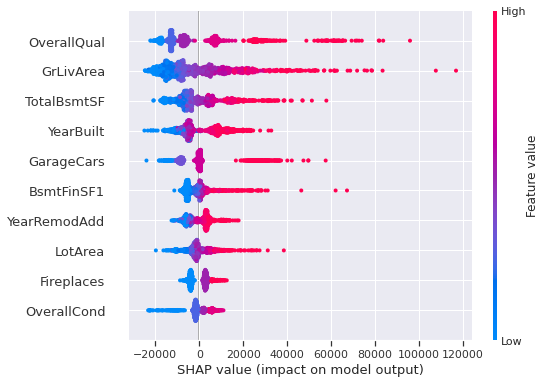

In [ ]:
import shap
explainer = shap.TreeExplainer(XGB_reg)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, max_display=10)

OverallQual и GrLivArea действительно имеют большой вес в предсказании, как мы и предположили ранее по их корреляции с SalePrice.

In [ ]:
X_cat = test[test.columns[test.dtypes == object]]
X_cat = OHE.transform(X_cat)
X_test = test.drop(columns=test.columns[test.dtypes == object])
X_test = X_test.join(pd.DataFrame(X_cat, columns=OHE.get_feature_names_out()))
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y_test = XGB_reg.predict(X_test)

In [ ]:
import xgboost as xgb
from hyperopt import hp, tpe, fmin
from sklearn.model_selection import cross_val_score

valgrid = {'n_estimators':hp.quniform('n_estimators', 1500, 2500, 25),
         'gamma':hp.uniform('gamma', 0.01, 0.05),
         'base_score':hp.uniform('base_score',0.6,0.9),
         'learning_rate':hp.uniform('learning_rate', 0.00001, 0.03),
         'max_depth':hp.quniform('max_depth', 3,8,1),
         'subsample':hp.uniform('subsample', 0.50, 0.95),
         'colsample_bytree':hp.uniform('colsample_bytree', 0.50, 0.95),
         'colsample_bylevel':hp.uniform('colsample_bylevel', 0.50, 0.95),
         'colsample_bynode':hp.uniform('colsample_bynode', 0.50, 0.95),
         'reg_lambda':hp.uniform('reg_lambda', 1, 20)
        }

def objective(params):
    params = {'n_estimators': int(params['n_estimators']),
             'gamma': params['gamma'],
             'base_score': params['base_score'],
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth']),
             'subsample': params['subsample'],
             'colsample_bytree': params['colsample_bytree'],
             'colsample_bylevel': params['colsample_bylevel'],
             'colsample_bynode': params['colsample_bynode'],  
             'reg_lambda': params['reg_lambda']}
    
    xb_a= xgb.XGBRegressor(**params)
    score = cross_val_score(xb_a, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1).mean()
    return -score

bestP = fmin(fn= objective, space= valgrid, max_evals=5, rstate=np.random.RandomState(42), algo=tpe.suggest)

100%|██████████| 10/10 [11:50<00:00, 71.06s/it, best loss: 595055963.5901896]


In [ ]:
print(bestP)

{'base_score': 0.7943374765040633, 'colsample_bylevel': 0.6370084899664278, 'colsample_bynode': 0.8327769053856892, 'colsample_bytree': 0.6579191007046148, 'gamma': 0.026564745299421537, 'learning_rate': 0.020107736968585345, 'max_depth': 5.0, 'n_estimators': 2425.0, 'reg_lambda': 14.826789120369174, 'subsample': 0.6845467814839912}


In [ ]:
# Prediction using XGB model having the best set of hyperparameters
import pandas as pd_out
import xgboost 
from sklearn.model_selection import train_test_split
import numpy as np
reg_final = xgboost.XGBRegressor(base_score=bestP['base_score'], 
            colsample_bylevel=bestP['colsample_bylevel'], colsample_bynode=bestP['colsample_bynode'], 
            colsample_bytree=bestP['colsample_bytree'], #eval_metric='rmse', 
            gamma=bestP['gamma'], learning_rate=bestP['learning_rate'],
            max_depth=int(bestP['max_depth']), n_estimators=int(bestP['n_estimators']), 
            #n_jobs=0,num_parallel_tree=1, objective='reg:squarederror', 
            random_state=42, reg_lambda=bestP['reg_lambda'], subsample=bestP['subsample'])
#X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=123)
#reg_final.fit(X_train,Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)], verbose=False)
reg_final.fit(X_train,y_train)

print ("Training score:",reg_final.score(X_train,y_train), "Test Score:",reg_final.score(X_valid, y_valid))


[02:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score: 0.9974733989431693 Test Score: 0.9006425123106896


In [ ]:
y_test = reg_final.predict(X_test)

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test.index
submission['SalePrice'] = y_test
submission.to_csv('submission.csv',index=False)